In [ ]:
## Importing Polymer MFR Data

import numpy as np
import pandas as pd

data = pd.read_csv('polymer_reactor.txt')

# i. Exploratory Data Analysis and Preprocessing

In [ ]:
data.columns = ['Time','C3=','H2R','Pressure','Level','C2=','Cat','Temp','MFR']
data['lnMFR'] = np.log(data['MFR'].values) #adding extra column: natural log of MFR - This is a better way to express the data as it helps with correlations for linear regression methods
data.head()

,Time,C3=,H2R,Pressure,Level,C2=,Cat,Temp,MFR,lnMFR
0,04-05-18 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4,1.223775
1,04-05-18 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2,1.163151
2,04-05-18 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2,1.163151
3,04-06-18 1:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1,1.131402
4,04-06-18 3:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3,1.193922


In [ ]:
data.describe()

,C3=,H2R,Pressure,Level,C2=,Cat,Temp,MFR,lnMFR
count,2486.000000,2560.000000,2484.000000,2484.000000,2484.00000,2486.000000,2484.000000,2564.000000,2564.000000
mean,25306.285729,0.178427,30.663706,77.651055,42525.14000,0.138530,80.144365,8.185218,1.901381
std,1706.481672,0.077473,0.423345,0.919600,11331.86896,0.041869,0.823554,5.088696,0.638107
min,16106.025000,0.000000,26.946344,74.575958,9610.46480,0.022162,77.760117,1.500000,0.405465
25%,24361.632000,0.136000,30.446129,76.992151,34795.53500,0.113764,79.677458,3.700000,1.308333
50%,25365.754500,0.173500,30.622631,77.494477,41550.56250,0.132986,80.044308,4.300000,1.458615
75%,26398.452250,0.200000,30.925738,78.210867,50010.29500,0.156990,80.496296,12.900000,2.557227
max,30083.688000,0.980000,32.674332,83.841675,106073.61000,0.677979,91.566544,38.000000,3.637586


In [ ]:
print('Length of data before removing null values', len(data))

Length of data before removing null values 2564


In [ ]:
## Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Time         0
C3=         78
H2R          4
Pressure    80
Level       80
C2=         80
Cat         78
Temp        80
MFR          0
lnMFR        0
dtype: int64


In [ ]:
del data['Time'] #dropping Time feature
data = data.dropna() # drop any row with NaN
data.head()

,C3=,H2R,Pressure,Level,C2=,Cat,Temp,MFR,lnMFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4,1.223775
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2,1.163151
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2,1.163151
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1,1.131402
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3,1.193922


In [ ]:
print('Length of data after removing null values', len(data))

Length of data after removing null values 2484


In [ ]:
## Checking for missing values again
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 C3=         0
H2R         0
Pressure    0
Level       0
C2=         0
Cat         0
Temp        0
MFR         0
lnMFR       0
dtype: int64


## Performing some data visualization

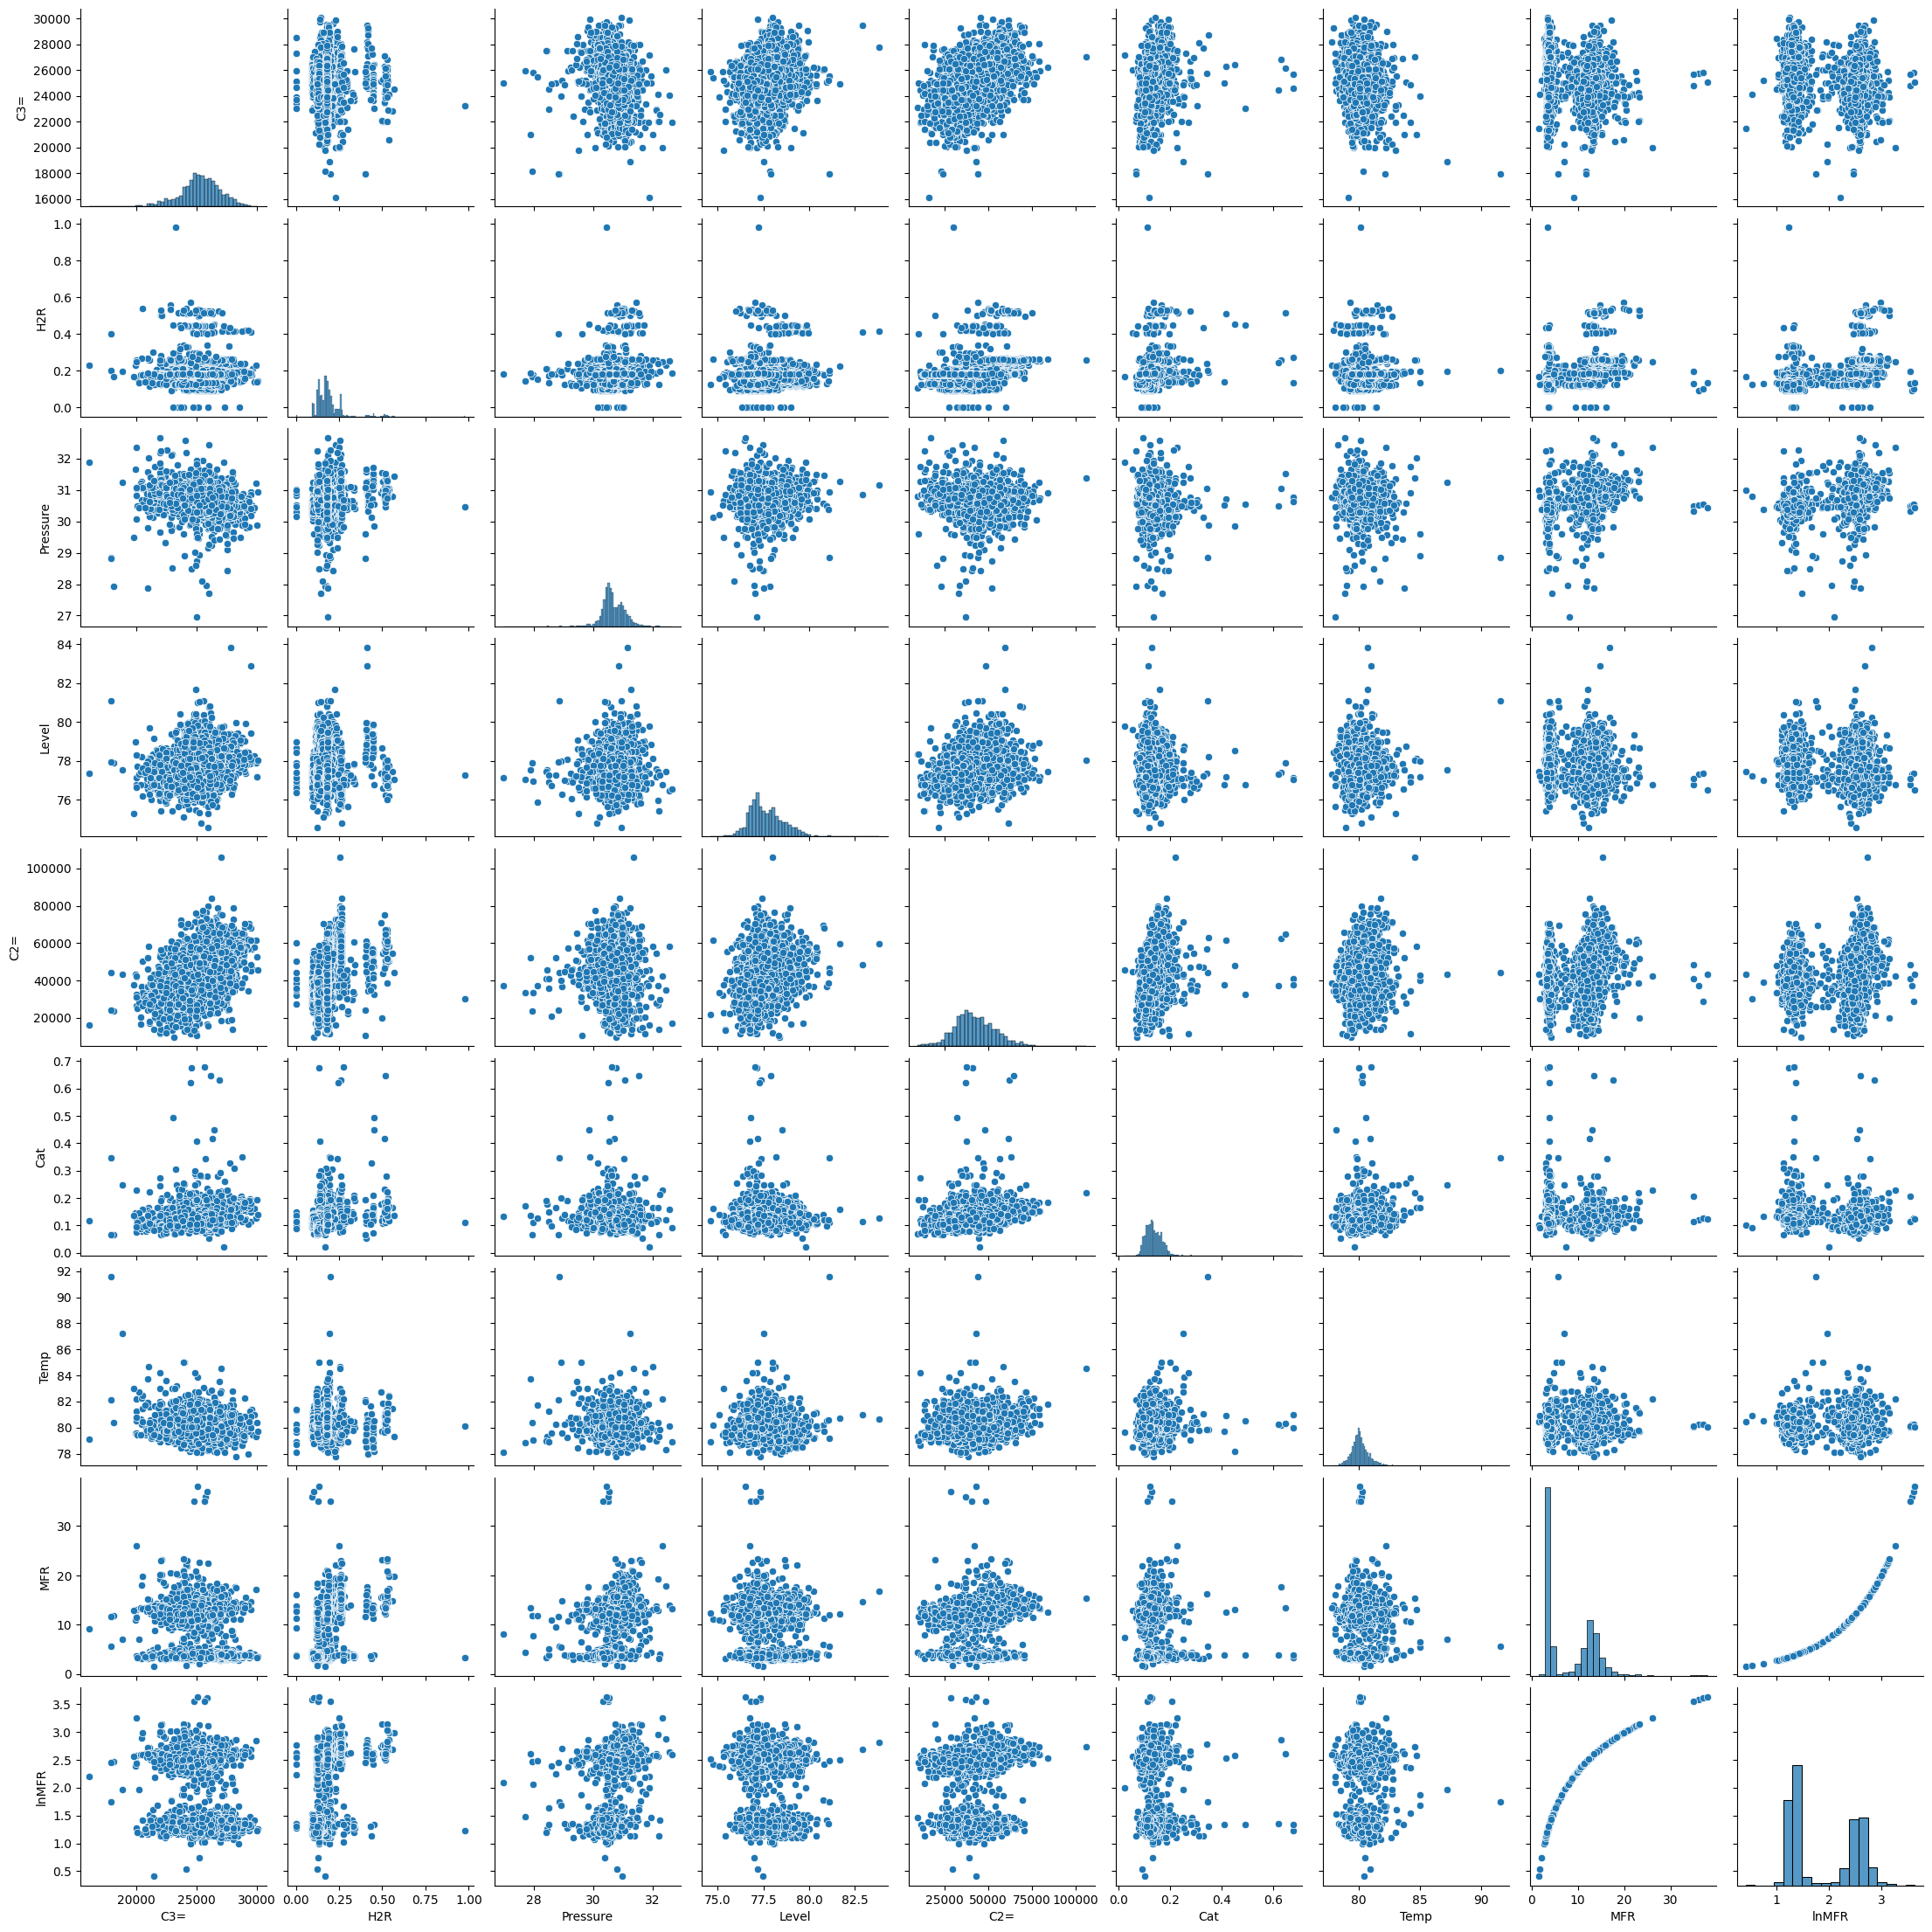

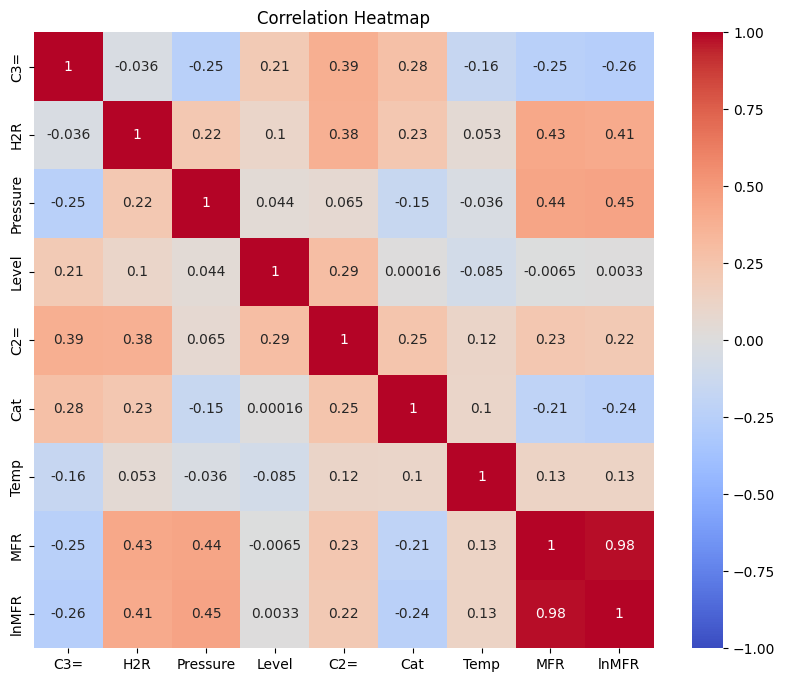

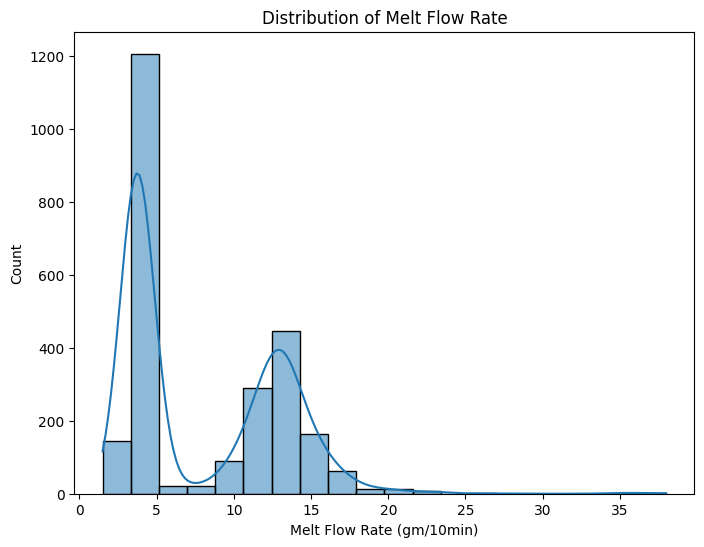

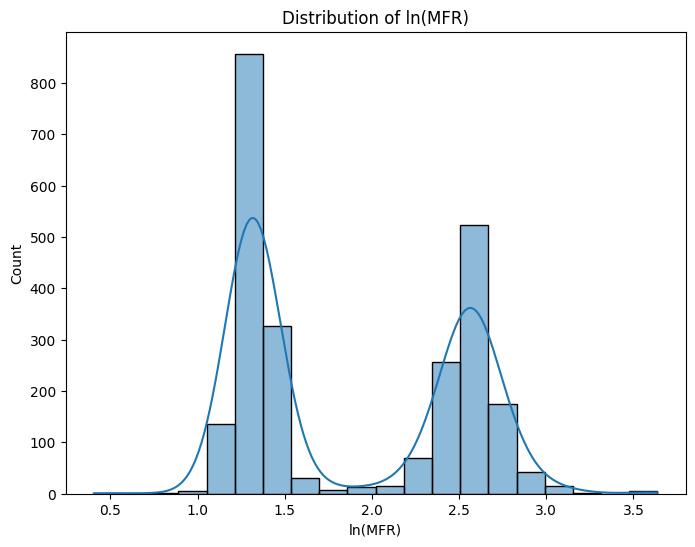

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to help visualize relationships between the different features
sns.pairplot(data)
plt.show()

# Making a correlation heatmap to find out which features correlates most with MFR/ln(MFR)
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Distribution of MFR: Melt Flow Rate using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['MFR'], bins=20, kde=True) #kde=True adds a Kernel Density Estimate (KDE) curve to the plot, showing the estimated probability density function of the data.
plt.xlabel('Melt Flow Rate (gm/10min)')
plt.ylabel('Count')
plt.title('Distribution of Melt Flow Rate')
plt.show()

# Distribution of MFR: Melt Flow Rate using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['lnMFR'], bins=20, kde=True) #kde=True adds a Kernel Density Estimate (KDE) curve to the plot, showing the estimated probability density function of the data.
plt.xlabel('ln(MFR)')
plt.ylabel('Count')
plt.title('Distribution of ln(MFR)')
plt.show()

In [ ]:
# Pressure and H2R shows the most positive correlation among the other variables
# On the other hand, C3= and Cat shows the most negative correlation

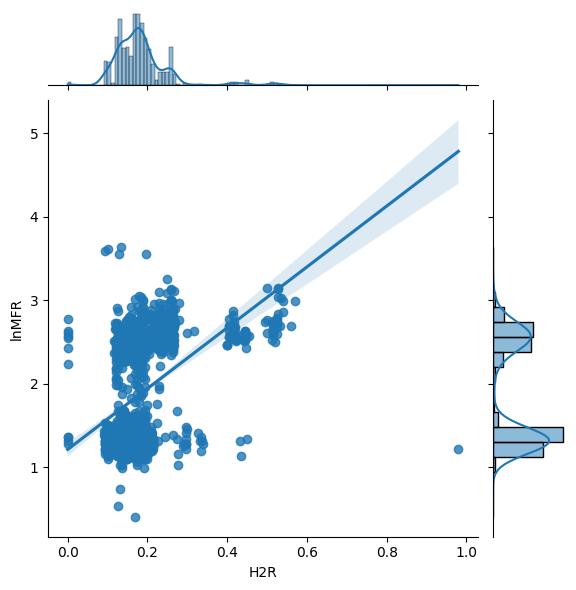

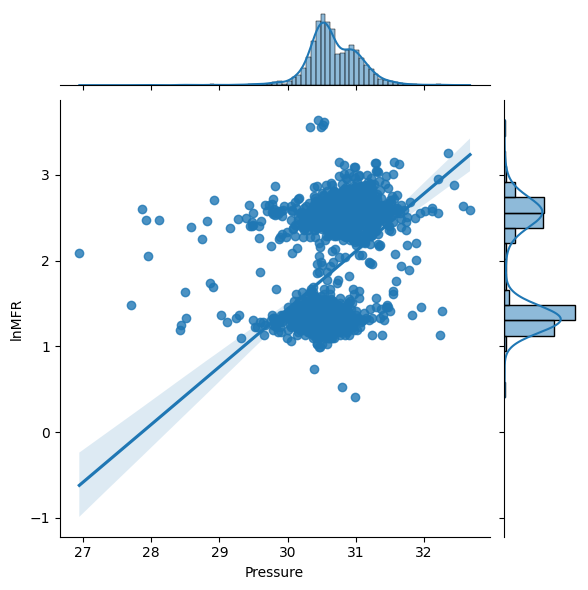

In [ ]:
## Using joint plot
# A joint plot is a type of plot in data visualization that allows us to display the relationship
# between two numerical variables. It combines several plots into one to show both the individual distributions of the variables and their joint distribution.

# Positive correlations
sns.jointplot(x='H2R', y='lnMFR', data=data, kind='reg') #kind = 'reg' shows linear regression line and confidence intervals.
sns.jointplot(x='Pressure', y='lnMFR', data=data, kind='reg')

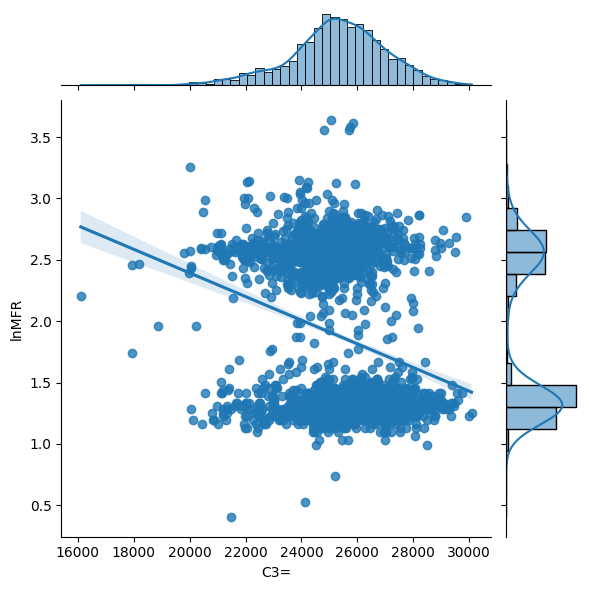

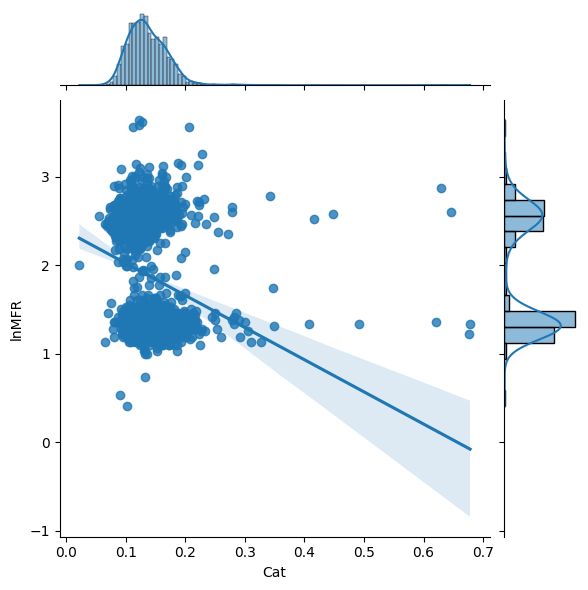

In [ ]:
# Showing negative correlations using jointplot
sns.jointplot(x='C3=', y='lnMFR', data=data, kind='reg') #kind = 'reg' shows linear regression line and confidence intervals.
sns.jointplot(x='Cat', y='lnMFR', data=data, kind='reg')

<Axes: xlabel='lnMFR', ylabel='count'>

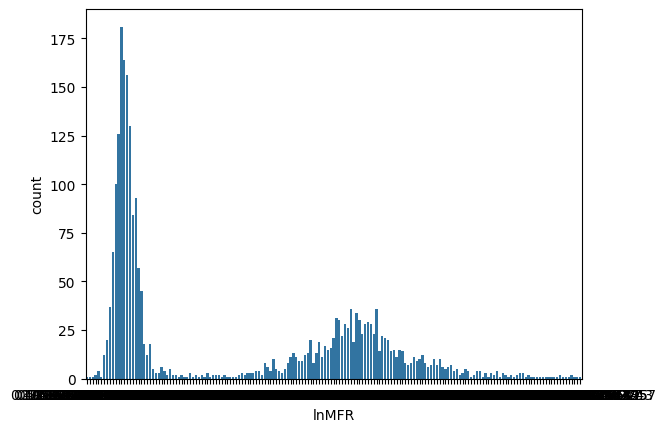

In [ ]:
# Using Countplot to visualize distribution of ln(MFR)
# A count plot is a type of plot in data visualization that displays the count of observations in each category of a categorical variable.
# It helps visualize the distribution of categorical data by showing the frequency or count of each category.
sns.countplot(x=data['lnMFR'])

## Checking for outliers

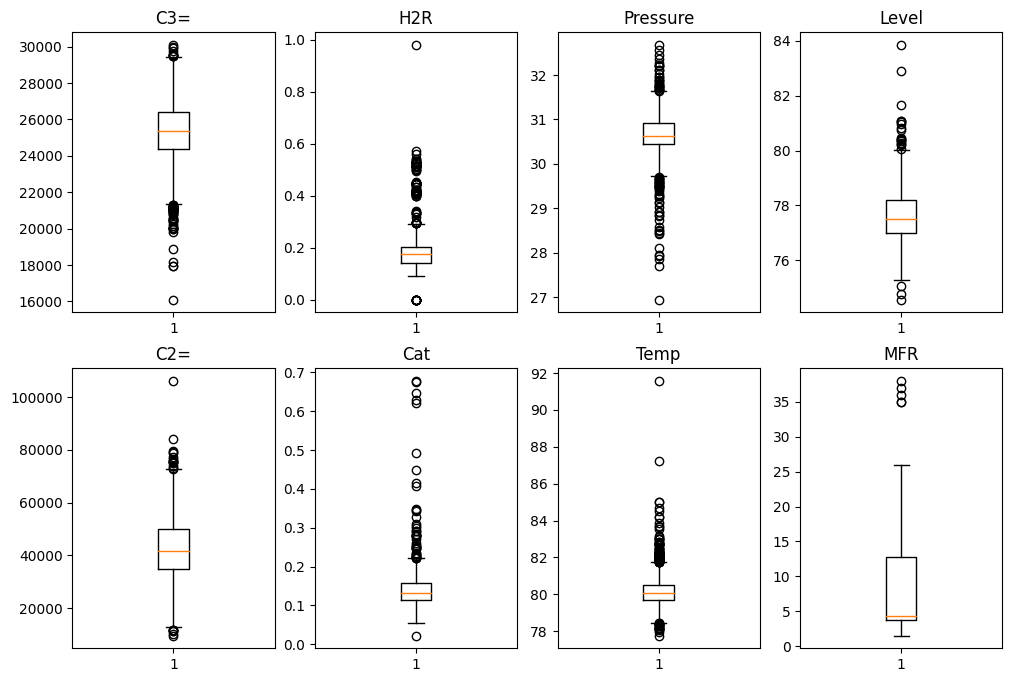

In [ ]:
# Detecting Outliers using box plot to show outlying points.
# A box plot visualizes the distribution of the data, showing the median, quartiles, and any potential outliers.
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
for i,c in enumerate(data.columns):
    if i<=7:
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

In [ ]:
#Checking shape of data before removing outliers
print('shape before', data.shape)

#Removing outliers of H2R by removing select rows
data = data[data['H2R']<0.7]
data = data[data['H2R']>0.01]

print('shape after', data.shape) #Checking shape of data after removing outliers

shape before (2484, 9)
shape after (2472, 9)


In [ ]:
print('shape before', data.shape)

# Removing some more outliers
data = data[data['C2=']<100000]
data = data[data['MFR']<30]
data = data[data['Temp']<86]
data = data[data['Cat']<0.4]
data = data[data['Level']<82]

print('shape after', data.shape)

shape before (2472, 9)
shape after (2453, 9)


In [ ]:
data = data[data['C3=']>17000]
data = data[data['Pressure']>27.5]

print('shape after', data.shape)

shape after (2451, 9)


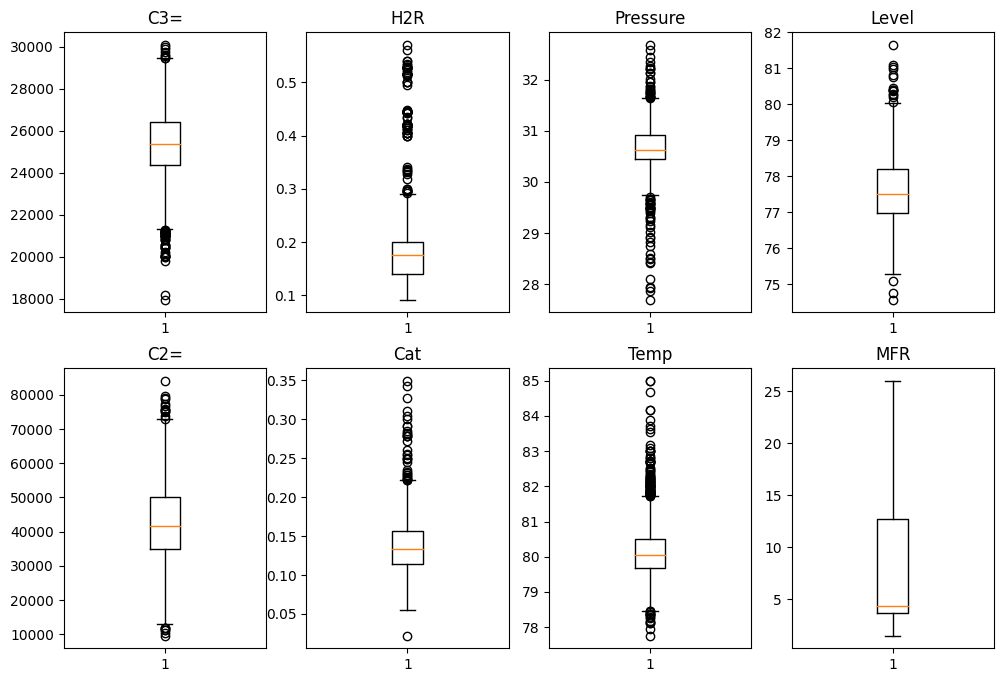

In [ ]:
# Plotting box plot to check for outliers again
plt.figure(figsize=(12,8))
for i,c in enumerate(data.columns):
    if i<=7:
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

# ii. Feature Engineering/Selection

In [ ]:
#Removing MFR column as we no longer need it
del data['MFR']
data.head()

,C3=,H2R,Pressure,Level,C2=,Cat,Temp,lnMFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,1.223775
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,1.163151
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,1.163151
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,1.131402
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,1.193922


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Using MinMaxScaler to scale our data
minmax_scaler = MinMaxScaler()
data_minmax = data.copy()  # Making a copy to avoid modifying original data
data_minmax = minmax_scaler.fit_transform(data_minmax)
type(data_minmax)

numpy.ndarray

In [ ]:
ds_minmax = pd.DataFrame(data_minmax,columns=data.columns)
ds_minmax.head()

,C3=,H2R,Pressure,Level,C2=,Cat,Temp,lnMFR
0,0.569152,0.127615,0.545624,0.718469,0.554246,0.433554,0.364969,0.286862
1,0.625256,0.127615,0.568205,0.559378,0.438387,0.328843,0.152267,0.265609
2,0.637786,0.127615,0.533829,0.603209,0.480131,0.390784,0.146292,0.265609
3,0.589113,0.127615,0.642044,0.649985,0.449773,0.395493,0.174584,0.254480
4,0.568934,0.121339,0.599078,0.579834,0.413855,0.306965,0.176763,0.276397


# iii. Regression Model(s)
- linear, polynomial, ridge, lasso

In [ ]:
# Dividing the dataset ds to train and test
from sklearn.model_selection import train_test_split

# Assuming 'ds' is your preprocessed DataFrame
X = ds_minmax.drop(columns=['lnMFR'])  # Features
y = ds_minmax['lnMFR']  # Target variable


##iv. Linear Regression: Training and Testing

1th fold r2: 0.5419263984176235
1th fold MSE: 0.02270137020406984
1th fold RMSE: 0.15066973884649112
2th fold r2: 0.44864313396803124
2th fold MSE: 0.027036954535739306
2th fold RMSE: 0.16442917787223563
3th fold r2: 0.48204071030232887
3th fold MSE: 0.025022652509267683
3th fold RMSE: 0.15818550031297965
4th fold r2: 0.5023443349496399
4th fold MSE: 0.02480065330177168
4th fold RMSE: 0.15748223170177542
5th fold r2: 0.4759334235743552
5th fold MSE: 0.025182178933111463
5th fold RMSE: 0.158688937651972


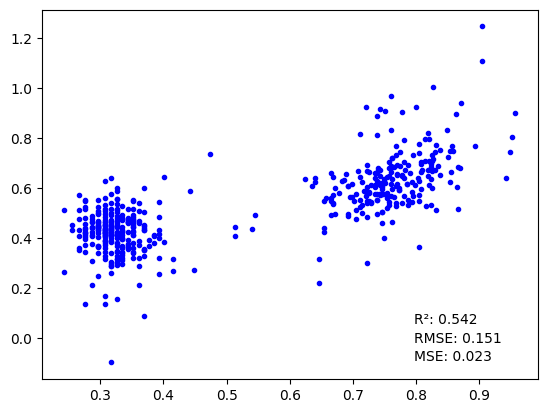

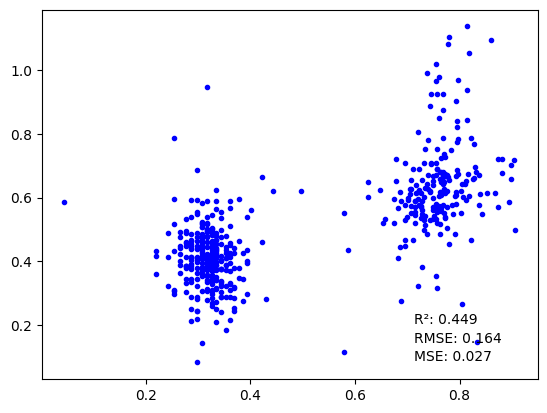

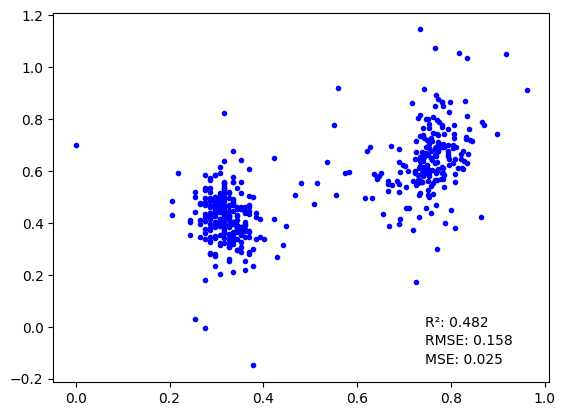

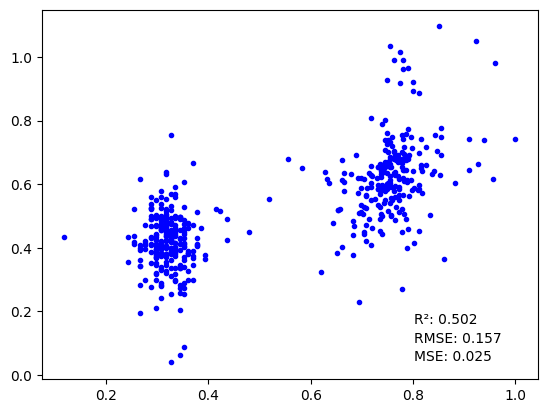

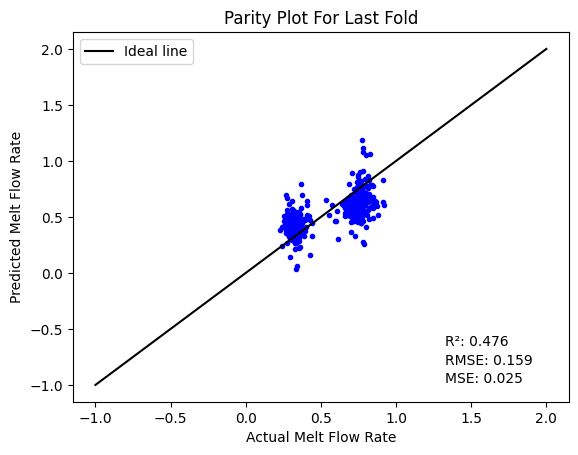

------------------------------
Average R² Score over 5-fold cross-validation: 0.4901776002423957
Average MSE over 5-fold cross-validation: 0.024948761896791995
Average RMSE over 5-fold cross-validation: 0.15789111727709076


In [ ]:
#Using 5 fold cross validation

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Initialize an empty list to store R² scores
r2_scores = []

mse_scores = []
rmse_scores = []

# Initialize model
linear_reg = LinearRegression()

i=1
# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    linear_reg.fit(X_train, y_train)
    linear_pred = linear_reg.predict(X_test)

    # Calculate R² score for this fold
    fold_r2 = r2_score(y_test, linear_pred)

    fold_mse = mean_squared_error(y_test, linear_pred)
    fold_rmse = np.sqrt(fold_mse)

    print(f'{i}th fold r2:',fold_r2)
    print(f'{i}th fold MSE:', fold_mse)
    print(f'{i}th fold RMSE:', fold_rmse)

    i=i+1

    r2_scores.append(fold_r2)
    mse_scores.append(fold_mse)
    rmse_scores.append(fold_rmse)

    # Creating a new figure for each fold
    plt.figure()

    # Creating a parity plot
    plt.plot(y_test, linear_pred, 'b.')

    # Adding labels for MSE, RMSE, and R²
    plt.text(0.75, 0.05, 'MSE: {:.3f}'.format(fold_mse), transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.75, 0.1, 'RMSE: {:.3f}'.format(fold_rmse), transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.75, 0.15, 'R²: {:.3f}'.format(fold_r2), transform=plt.gca().transAxes, fontsize=10)


plt.plot([-1, 2], [-1, 2], 'k-', label='Ideal line')
plt.xlabel('Actual Melt Flow Rate')
plt.ylabel('Predicted Melt Flow Rate')
plt.title('Parity Plot For Last Fold')
plt.legend()
plt.show()

# Calculate the average R² score, MSE, and RMSE over 5-fold cross-validation
average_r2 = np.mean(r2_scores)
average_mse = np.mean(mse_scores)
average_rmse = np.mean(rmse_scores)

print('------------------------------')
print("Average R² Score over 5-fold cross-validation:", average_r2)
print("Average MSE over 5-fold cross-validation:", average_mse)
print("Average RMSE over 5-fold cross-validation:", average_rmse)

##iv. Ridge Regression: Training and Testing

1th fold r2: 0.5389523887396463
1th fold MSE: 0.022848757205759133
1th fold RMSE: 0.15115805372443486
2th fold r2: 0.4524368535563421
2th fold MSE: 0.0268509214411146
2th fold RMSE: 0.16386250773473046
3th fold r2: 0.48407239660348345
3th fold MSE: 0.024924501590203554
3th fold RMSE: 0.15787495555091552
4th fold r2: 0.4997522587778125
4th fold MSE: 0.02492982933046769
4th fold RMSE: 0.15789182794073825
5th fold r2: 0.47380635054611
5th fold MSE: 0.025284387957709823
5th fold RMSE: 0.15901065359814676


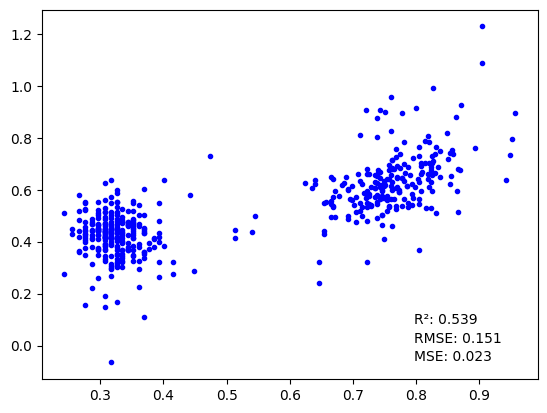

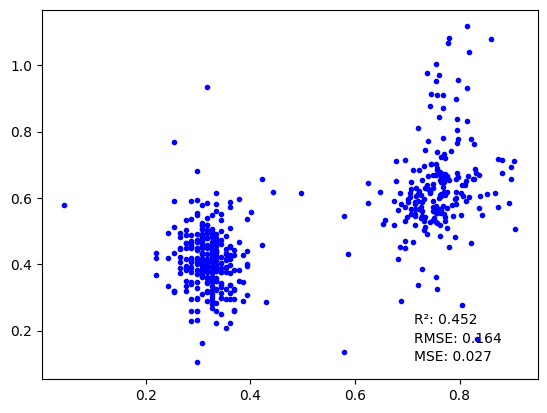

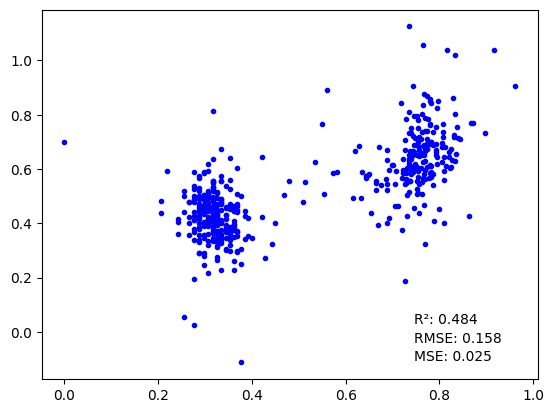

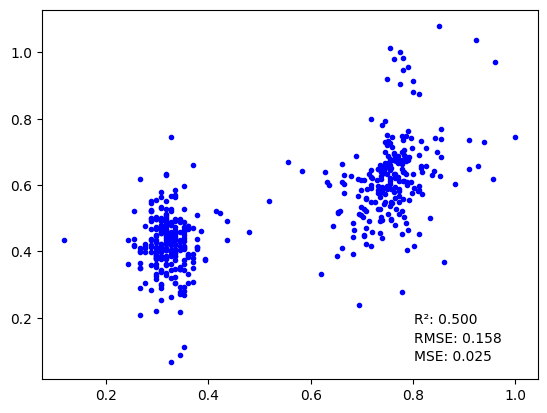

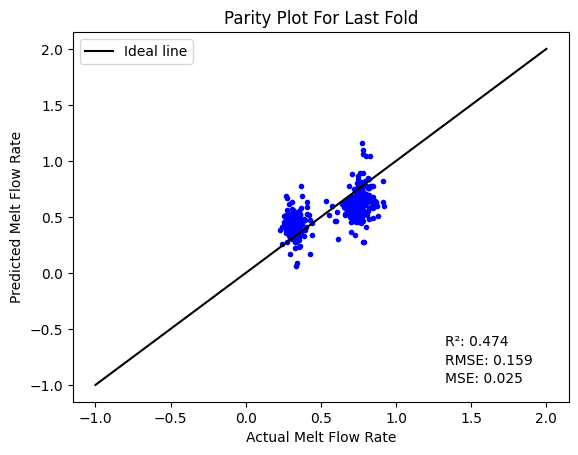

------------------------------
Average R² Score over 5-fold cross-validation: 0.48980404964467883
Average MSE over 5-fold cross-validation: 0.02496767950505096
Average RMSE over 5-fold cross-validation: 0.15795959970979317


In [ ]:
#Using 5 fold cross validation

from sklearn.linear_model import Ridge

# Initialize an empty list to store R² scores
r2_scores = []

mse_scores = []
rmse_scores = []

# Initialize model
ridge = Ridge(alpha=1.0)  # We can adjust the alpha (regularization strength)

i=1

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)

    # Calculate R² score for this fold
    fold_r2 = r2_score(y_test, ridge_pred)

    fold_mse = mean_squared_error(y_test, ridge_pred)
    fold_rmse = np.sqrt(fold_mse)

    print(f'{i}th fold r2:',fold_r2)
    print(f'{i}th fold MSE:', fold_mse)
    print(f'{i}th fold RMSE:', fold_rmse)

    i=i+1

    r2_scores.append(fold_r2)
    mse_scores.append(fold_mse)
    rmse_scores.append(fold_rmse)

    # Creating a new figure for each fold
    plt.figure()

    # Creating a parity plot
    plt.plot(y_test, ridge_pred, 'b.')

    # Adding labels for MSE, RMSE, and R²
    plt.text(0.75, 0.05, 'MSE: {:.3f}'.format(fold_mse), transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.75, 0.1, 'RMSE: {:.3f}'.format(fold_rmse), transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.75, 0.15, 'R²: {:.3f}'.format(fold_r2), transform=plt.gca().transAxes, fontsize=10)

# Creating a parity plot
# Points falling perfectly on the straight line represent instances where
# the model's predictions perfectly match the actual measurements.

plt.plot([-1, 2], [-1, 2], 'k-', label='Ideal line')
plt.xlabel('Actual Melt Flow Rate')
plt.ylabel('Predicted Melt Flow Rate')
plt.title('Parity Plot For Last Fold')
plt.legend()
plt.show()

# Calculate the average R² score, MSE, and RMSE over 5-fold cross-validation
average_r2 = np.mean(r2_scores)
average_mse = np.mean(mse_scores)
average_rmse = np.mean(rmse_scores)

print('------------------------------')
print("Average R² Score over 5-fold cross-validation:", average_r2)
print("Average MSE over 5-fold cross-validation:", average_mse)
print("Average RMSE over 5-fold cross-validation:", average_rmse)

##iv. Lasso Regression: Training and Testing

1th fold r2: -0.0003590780502360502
1th fold MSE: 0.04957614167105958
1th fold RMSE: 0.22265700454075002
2th fold r2: -0.004950206561215698
2th fold MSE: 0.04927986703243846
2th fold RMSE: 0.2219906913193399
3th fold r2: -0.0037484785032040335
3th fold MSE: 0.04849116500826174
3th fold RMSE: 0.22020709572641328
4th fold r2: -0.0038403065422987215
4th fold MSE: 0.05002634785716832
4th fold RMSE: 0.22366570559021406
5th fold r2: -0.0025081644588897944
5th fold MSE: 0.048172009273120917
5th fold RMSE: 0.21948122760983663


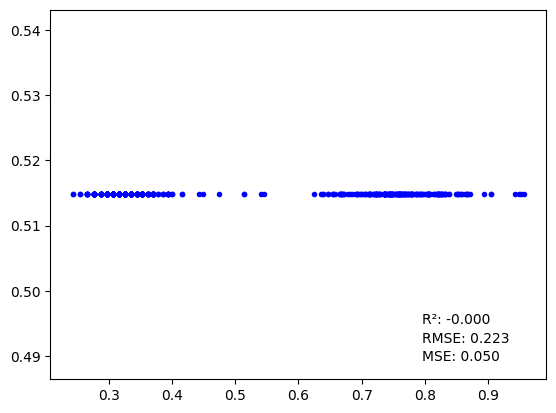

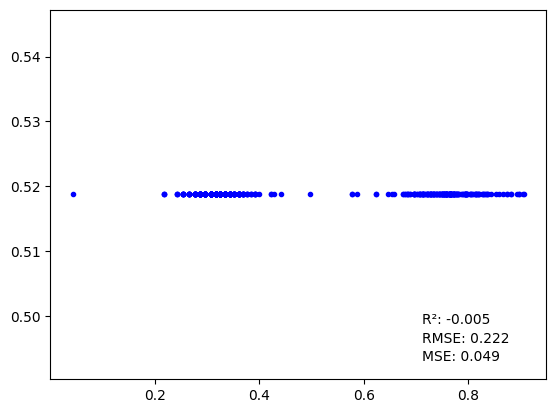

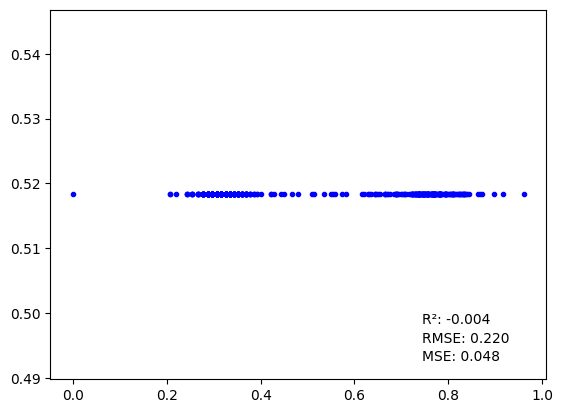

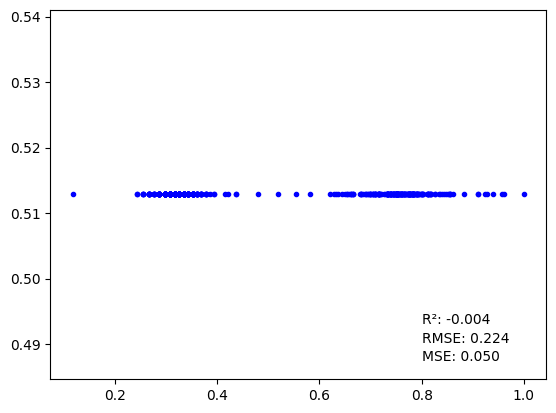

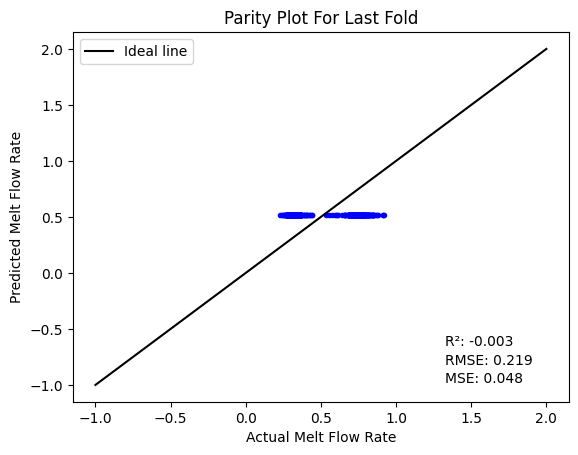

------------------------------
Average R² Score over 5-fold cross-validation: -0.0030812468231688596
Average MSE over 5-fold cross-validation: 0.0491091061684098
Average RMSE over 5-fold cross-validation: 0.2216003449573108


In [ ]:
from sklearn.linear_model import Lasso

# Initialize an empty list to store R² scores
r2_scores = []

mse_scores = []
rmse_scores = []

# Initialize model
lasso = Lasso(alpha=0.3)  # We can adjust the alpha (regularization strength)

i=1
# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)

    # Calculate R² score for this fold
    fold_r2 = r2_score(y_test, lasso_pred)


    fold_mse = mean_squared_error(y_test, lasso_pred)
    fold_rmse = np.sqrt(fold_mse)

    print(f'{i}th fold r2:',fold_r2)
    print(f'{i}th fold MSE:', fold_mse)
    print(f'{i}th fold RMSE:', fold_rmse)
    i=i+1

    r2_scores.append(fold_r2)
    mse_scores.append(fold_mse)
    rmse_scores.append(fold_rmse)

    # Creating a new figure for each fold
    plt.figure()

    # Creating a parity plot
    plt.plot(y_test, lasso_pred, 'b.')

    # Adding labels for MSE, RMSE, and R²
    plt.text(0.75, 0.05, 'MSE: {:.3f}'.format(fold_mse), transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.75, 0.1, 'RMSE: {:.3f}'.format(fold_rmse), transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.75, 0.15, 'R²: {:.3f}'.format(fold_r2), transform=plt.gca().transAxes, fontsize=10)


# Creating a parity plot
# Points falling perfectly on the straight line represent instances where
# the model's predictions perfectly match the actual measurements.

plt.plot([-1, 2], [-1, 2], 'k-', label='Ideal line')
plt.xlabel('Actual Melt Flow Rate')
plt.ylabel('Predicted Melt Flow Rate')
plt.title('Parity Plot For Last Fold')
plt.legend()
plt.show()

# Calculate the average R² score, MSE, and RMSE over 5-fold cross-validation
average_r2 = np.mean(r2_scores)
average_mse = np.mean(mse_scores)
average_rmse = np.mean(rmse_scores)

print('------------------------------')
print("Average R² Score over 5-fold cross-validation:", average_r2)
print("Average MSE over 5-fold cross-validation:", average_mse)
print("Average RMSE over 5-fold cross-validation:", average_rmse)

##iv. Polynomial Regression: Training and Testing

1th fold r2: 0.6370685057571368
1th fold MSE: 0.0179862846954341
1th fold RMSE: 0.13411295498733186
2th fold r2: 0.5564035502665451
2th fold MSE: 0.021752693731691697
2th fold RMSE: 0.1474879443605195
3th fold r2: 0.5989503264389398
3th fold MSE: 0.01937474010038741
3th fold RMSE: 0.13919317548065138
4th fold r2: 0.6373826631148969
4th fold MSE: 0.018071022767095657
4th fold RMSE: 0.13442850429538988
5th fold r2: 0.6163734942982332
5th fold MSE: 0.018433824526561553
5th fold RMSE: 0.13577122127520821


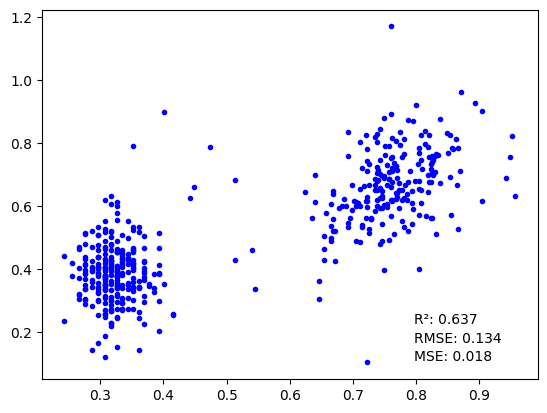

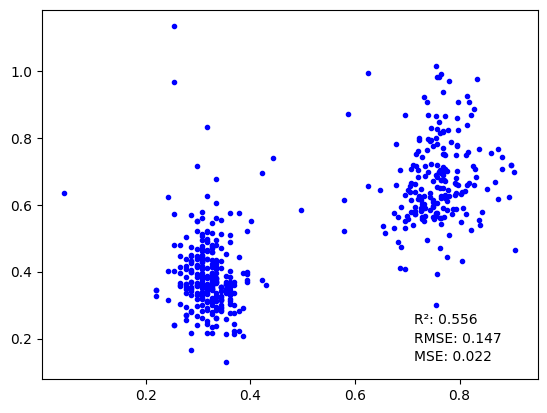

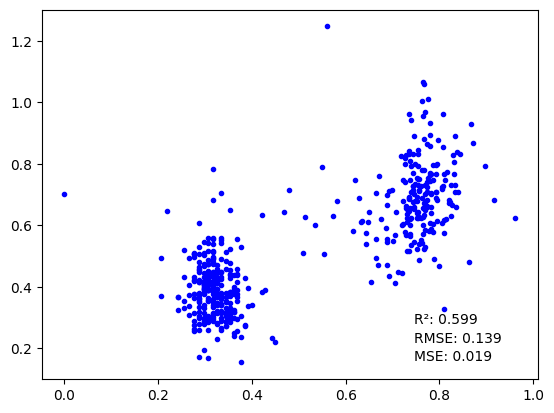

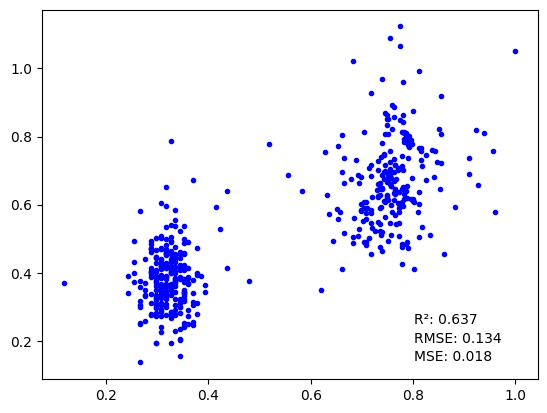

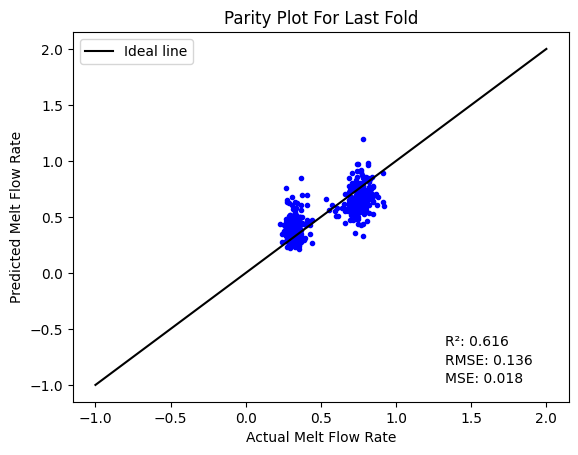

------------------------------
Average R² Score over 5-fold cross-validation: 0.6092357079751504
Average MSE over 5-fold cross-validation: 0.019123713164234085
Average RMSE over 5-fold cross-validation: 0.13819876007982018


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Initialize an empty list to store R² scores
r2_scores = []

mse_scores = []
rmse_scores = []

# Initialize model
degree = 2  # Polynomial degree
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

i=1
# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    poly_reg.fit(X_train, y_train)
    poly_pred = poly_reg.predict(X_test)

    # Calculate R² score for this fold
    fold_r2 = r2_score(y_test, poly_pred)

    fold_mse = mean_squared_error(y_test, poly_pred)
    fold_rmse = np.sqrt(fold_mse)

    print(f'{i}th fold r2:',fold_r2)
    print(f'{i}th fold MSE:', fold_mse)
    print(f'{i}th fold RMSE:', fold_rmse)
    i=i+1

    r2_scores.append(fold_r2)
    mse_scores.append(fold_mse)
    rmse_scores.append(fold_rmse)

    # Creating a new figure for each fold
    plt.figure()

    # Creating a parity plot
    plt.plot(y_test, poly_pred, 'b.')

    # Adding labels for MSE, RMSE, and R²
    plt.text(0.75, 0.05, 'MSE: {:.3f}'.format(fold_mse), transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.75, 0.1, 'RMSE: {:.3f}'.format(fold_rmse), transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.75, 0.15, 'R²: {:.3f}'.format(fold_r2), transform=plt.gca().transAxes, fontsize=10)

# Creating a parity plot
# Points falling perfectly on the straight line represent instances where
# the model's predictions perfectly match the actual measurements.

plt.plot([-1, 2], [-1, 2], 'k-', label='Ideal line')
plt.xlabel('Actual Melt Flow Rate')
plt.ylabel('Predicted Melt Flow Rate')
plt.title('Parity Plot For Last Fold')
plt.legend()
plt.show()

# Calculate the average R² score, MSE, and RMSE over 5-fold cross-validation
average_r2 = np.mean(r2_scores)
average_mse = np.mean(mse_scores)
average_rmse = np.mean(rmse_scores)

print('------------------------------')
print("Average R² Score over 5-fold cross-validation:", average_r2)
print("Average MSE over 5-fold cross-validation:", average_mse)
print("Average RMSE over 5-fold cross-validation:", average_rmse)

# ii. Feature Engineering/Selection - 2 & Train/Test
- Seems to deacrease performance of all models if we leave/delete our 'Level' feature

Index(['C3=', 'H2R', 'Pressure', 'Level', 'C2=', 'Cat', 'Temp'], dtype='object')
lnMFR


<BarContainer object of 7 artists>

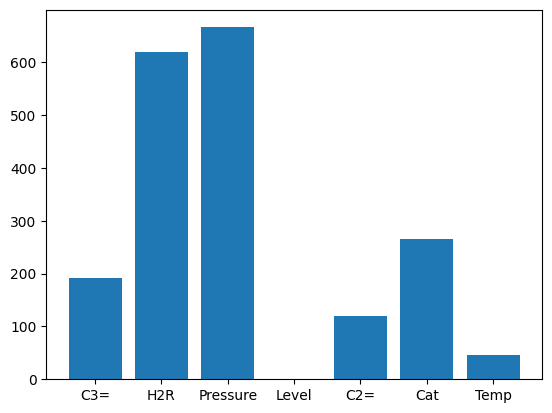

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

x_columns = ds_minmax.columns[0:-1]; print(x_columns )
z_column  = ds_minmax.columns[-1]; print(z_column)

x = data[x_columns]
z = data[z_column]

best = SelectKBest(score_func=f_regression, k='all')
fit = best.fit(x,z)
plt.bar(x=x.columns,height=fit.scores_)

# The bar plot displays the scores of each feature based on their relationship with the target variable.
# Higher scores indicate a stronger relationship between the feature and the target variable.

Therefore we can delete 'Level' column

In [ ]:
ds_minmax_modified = ds_minmax.drop('Level', axis=1)

In [ ]:
ds_minmax_modified.head()

,C3=,H2R,Pressure,C2=,Cat,Temp,lnMFR
0,0.626039,0.156122,0.605534,0.427522,0.216268,0.191178,0.253181
1,0.674735,0.156122,0.625137,0.338153,0.164036,0.079761,0.234424
2,0.685611,0.156122,0.595294,0.370353,0.194934,0.076631,0.234424
3,0.643364,0.156122,0.689241,0.346936,0.197283,0.091450,0.224601
4,0.625850,0.153061,0.651940,0.319230,0.153123,0.092592,0.243944


In [ ]:
from sklearn.model_selection import train_test_split
# Assuming 'ds' is your preprocessed DataFrame
X = ds_minmax_modified.drop(columns=['lnMFR'])  # Features
y = ds_minmax_modified['lnMFR']  # Target variable

# Splitting the dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
#print("Train set size:", len(X_train))
#print("Test set size:", len(X_test))

##iv. Linear Regression: Training and Testing

Linear Regression Metrics:
Mean Squared Error (MSE): 0.021575483807705045
R^2 Score: 0.4537217789466821
Linear Regression Metrics:
Mean Squared Error (MSE): 0.022715175970845977
R^2 Score: 0.39003678092234273
Linear Regression Metrics:
Mean Squared Error (MSE): 0.020978752890827936
R^2 Score: 0.45680668562625293
Linear Regression Metrics:
Mean Squared Error (MSE): 0.026224873057258905
R^2 Score: 0.3273730815207446
Linear Regression Metrics:
Mean Squared Error (MSE): 0.019652102239049982
R^2 Score: 0.4709659234581094
Linear Regression Metrics:
Mean Squared Error (MSE): 0.02161576380937159
R^2 Score: 0.44171833862331145
Linear Regression Metrics:
Mean Squared Error (MSE): 0.022563283182062455
R^2 Score: 0.4153685777400067
Linear Regression Metrics:
Mean Squared Error (MSE): 0.020742477925864863
R^2 Score: 0.46926479324285886
Linear Regression Metrics:
Mean Squared Error (MSE): 0.025119348153209497
R^2 Score: 0.3481890475362689
Linear Regression Metrics:
Mean Squared Error (MSE): 0.023638

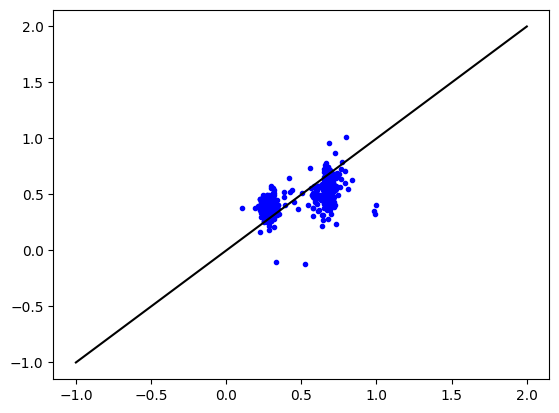

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Initialize an empty list to store R² scores
r2_scores = []

# Number of repetitions and random seeds
n_repeats = 10  # Number of repetitions
random_seeds = range(1, n_repeats + 1)  # Different random seeds for each repetition


for seed in random_seeds:

    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True)
    #print("Train set size:", len(X_train))
    #print("Test set size:", len(X_test))

    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    linear_pred = linear_reg.predict(X_test)

    linear_mse = mean_squared_error(y_test, linear_pred)
    linear_r2 = r2_score(y_test, linear_pred)

    r2_scores.append(linear_r2)

    print("Linear Regression Metrics:")
    print("Mean Squared Error (MSE):", linear_mse)
    print("R^2 Score:", linear_r2)

    # Creating a parity plot
    # Points falling perfectly on the straight line represent instances where
    # the model's predictions perfectly match the actual measurements.

# Calculate the average R² score
average_r2 = np.mean(r2_scores)
print('------------------------------')
print("Average R² Score over {} repetitions:".format(n_repeats), average_r2)

plt.plot(y_test, linear_pred,'b.') # actual Melt Flow Rate (y_test): x-axis against the predicted (MFR_pred): y-axis.
plt.plot([-1,2],[-1,2],'k-') #ideal line

##iv. Ridge Regression: Training and Testing

Ridge Regression Metrics:
Mean Squared Error (MSE): 0.02177888578164962
R^2 Score: 0.44857176379636166
Ridge Regression Metrics:
Mean Squared Error (MSE): 0.0227586486191966
R^2 Score: 0.38886942406084135
Ridge Regression Metrics:
Mean Squared Error (MSE): 0.02139592083679445
R^2 Score: 0.4460051455919495
Ridge Regression Metrics:
Mean Squared Error (MSE): 0.02534250585799725
R^2 Score: 0.35000441814955086
Ridge Regression Metrics:
Mean Squared Error (MSE): 0.01987702471494013
R^2 Score: 0.4649110163098238
Ridge Regression Metrics:
Mean Squared Error (MSE): 0.02175051046048882
R^2 Score: 0.43823816624013345
Ridge Regression Metrics:
Mean Squared Error (MSE): 0.022595226446472078
R^2 Score: 0.41454090403876664
Ridge Regression Metrics:
Mean Squared Error (MSE): 0.021120436888460287
R^2 Score: 0.45959400420426166
Ridge Regression Metrics:
Mean Squared Error (MSE): 0.024569760467028842
R^2 Score: 0.36245005745606573
Ridge Regression Metrics:
Mean Squared Error (MSE): 0.023830975004447107


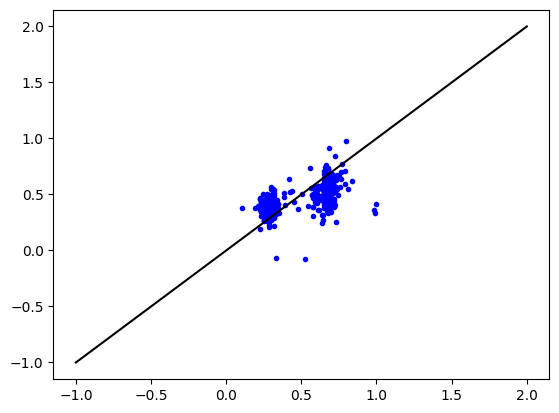

In [ ]:
from sklearn.linear_model import Ridge

# Initialize an empty list to store R² scores
r2_scores = []

# Number of repetitions and random seeds
n_repeats = 10  # Number of repetitions
random_seeds = range(1, n_repeats + 1)  # Different random seeds for each repetition

for seed in random_seeds:

    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True)
    #print("Train set size:", len(X_train))
    #print("Test set size:", len(X_test))

    ridge = Ridge(alpha=1.0)  # We can adjust the alpha (regularization strength)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)

    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_r2 = r2_score(y_test, ridge_pred)

    r2_scores.append(ridge_r2)

    print("Ridge Regression Metrics:")
    print("Mean Squared Error (MSE):", ridge_mse)
    print("R^2 Score:", ridge_r2)


# Calculate the average R² score
average_r2 = np.mean(r2_scores)
print('------------------------------')
print("Average R² Score over {} repetitions:".format(n_repeats), average_r2)

# Creating a parity plot
# Points falling perfectly on the straight line represent instances where
# the model's predictions perfectly match the actual measurements.

plt.plot(y_test, ridge_pred,'b.') # actual Melt Flow Rate (y_test): x-axis against the predicted (MFR_pred): y-axis.
plt.plot([-1,2],[-1,2],'k-') #ideal line

##iv. Lasso Regression: Training and Testing

Lasso Regression Metrics:
Mean Squared Error (MSE): 0.03954517772546452
R^2 Score: -0.0012600195500271916
Lasso Regression Metrics:
Mean Squared Error (MSE): 0.037264046657851185
R^2 Score: -0.0006393031890039591
Lasso Regression Metrics:
Mean Squared Error (MSE): 0.038622282220375455
R^2 Score: -2.9200836638931804e-05
Lasso Regression Metrics:
Mean Squared Error (MSE): 0.03899308584065496
R^2 Score: -0.00011157780369575043
Lasso Regression Metrics:
Mean Squared Error (MSE): 0.0371752213297979
R^2 Score: -0.0007559826027427885
Lasso Regression Metrics:
Mean Squared Error (MSE): 0.03871839160985513
R^2 Score: -1.9358148106718431e-07
Lasso Regression Metrics:
Mean Squared Error (MSE): 0.03884435604673511
R^2 Score: -0.006486110161051828
Lasso Regression Metrics:
Mean Squared Error (MSE): 0.03909436342783374
R^2 Score: -0.00030262204292719197
Lasso Regression Metrics:
Mean Squared Error (MSE): 0.038547071554945175
R^2 Score: -0.00024106006533219926
Lasso Regression Metrics:
Mean Squared E

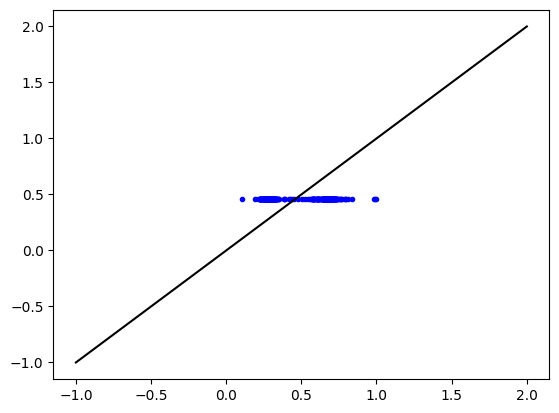

In [ ]:
from sklearn.linear_model import Lasso

# Initialize an empty list to store R² scores
r2_scores = []

# Number of repetitions and random seeds
n_repeats = 10  # Number of repetitions
random_seeds = range(1, n_repeats + 1)  # Different random seeds for each repetition

for seed in random_seeds:

    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True)
    #print("Train set size:", len(X_train))
    #print("Test set size:", len(X_test))


    lasso = Lasso(alpha=0.3)  # We can adjust the alpha (regularization strength)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)

    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_r2 = r2_score(y_test, lasso_pred)

    print("Lasso Regression Metrics:")
    print("Mean Squared Error (MSE):", lasso_mse)
    print("R^2 Score:", lasso_r2)

    r2_scores.append(lasso_r2)

# Calculate the average R² score
average_r2 = np.mean(r2_scores)
print('------------------------------')
print("Average R² Score over {} repetitions:".format(n_repeats), average_r2)

# Creating a parity plot
# Points falling perfectly on the straight line represent instances where
# the model's predictions perfectly match the actual measurements.

plt.plot(y_test, lasso_pred,'b.') # actual Melt Flow Rate (y_test): x-axis against the predicted (MFR_pred): y-axis.
plt.plot([-1,2],[-1,2],'k-') #ideal line

##iv. Polynomial Regression: Training and Testing

Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.01735219912143566
R^2 Score: 0.5606527968547511
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.01792082575089085
R^2 Score: 0.5187779052395316
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.016391983508745937
R^2 Score: 0.5755698206842215
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.018714971805346363
R^2 Score: 0.5199902860398432
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.014190884171385849
R^2 Score: 0.6179817705199884
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.016180973259580952
R^2 Score: 0.5820855226899684
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.016980863209212462
R^2 Score: 0.5600132246225337
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.019070447462486224
R^2 Score: 0.512046829066021
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.016429016931863938
R^2 Score: 0.5736906424049559
Polynomial Regression Metrics:


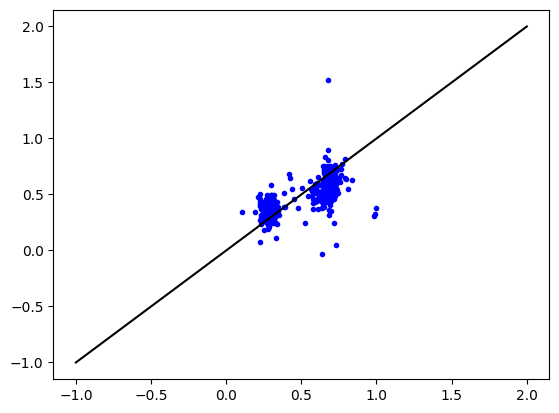

In [ ]:
# Degree 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Initialize an empty list to store R² scores
r2_scores = []

# Number of repetitions and random seeds
n_repeats = 10  # Number of repetitions
random_seeds = range(1, n_repeats + 1)  # Different random seeds for each repetition

for seed in random_seeds:

    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True)
    #print("Train set size:", len(X_train))
    #print("Test set size:", len(X_test))


    degree = 2  # Polynomial degree
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X_train, y_train)
    poly_pred = poly_reg.predict(X_test)

    poly_mse = mean_squared_error(y_test, poly_pred)
    poly_r2 = r2_score(y_test, poly_pred)

    print("Polynomial Regression Metrics:")
    print("Mean Squared Error (MSE):", poly_mse)
    print("R^2 Score:", poly_r2)

    r2_scores.append(poly_r2)

# Calculate the average R² score
average_r2 = np.mean(r2_scores)
print('------------------------------')
print("Average R² Score over {} repetitions:".format(n_repeats), average_r2)

# Creating a parity plot
# Points falling perfectly on the straight line represent instances where
# the model's predictions perfectly match the actual measurements.

plt.plot(y_test, poly_pred,'b.') # actual Melt Flow Rate (y_test): x-axis against the predicted (MFR_pred): y-axis.
plt.plot([-1,2],[-1,2],'k-') #ideal line

Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.02104442535996829
R^2 Score: 0.4671678581489185
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.01960022477621037
R^2 Score: 0.4736815504098567
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.01626863072761289
R^2 Score: 0.5787637381858749
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.08968247379543356
R^2 Score: -1.3002149851749998
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.015879451822090284
R^2 Score: 0.5725255736763821
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.01517541022881382
R^2 Score: 0.6080567261314245
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.02199342819562564
R^2 Score: 0.43013394360074086
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.017646408531510945
R^2 Score: 0.5484835363467337
Polynomial Regression Metrics:
Mean Squared Error (MSE): 0.04151932271501259
R^2 Score: -0.07736670233075182
Polynomial Regression Metrics:


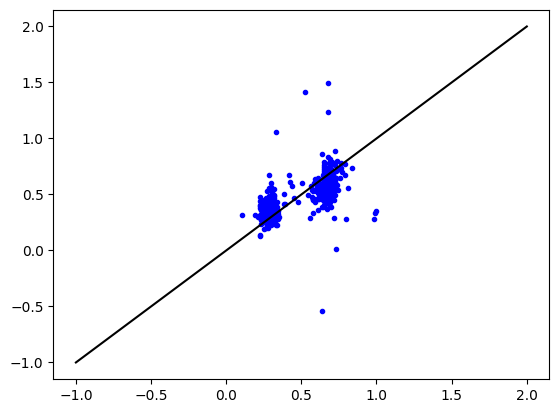

In [ ]:
#Degree 3 - Decreased performance

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Initialize an empty list to store R² scores
r2_scores = []

# Number of repetitions and random seeds
n_repeats = 10  # Number of repetitions
random_seeds = range(1, n_repeats + 1)  # Different random seeds for each repetition

for seed in random_seeds:

    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True)
    #print("Train set size:", len(X_train))
    #print("Test set size:", len(X_test))


    degree = 3  # Polynomial degree
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X_train, y_train)
    poly_pred = poly_reg.predict(X_test)

    poly_mse = mean_squared_error(y_test, poly_pred)
    poly_r2 = r2_score(y_test, poly_pred)

    print("Polynomial Regression Metrics:")
    print("Mean Squared Error (MSE):", poly_mse)
    print("R^2 Score:", poly_r2)

    r2_scores.append(poly_r2)

# Calculate the average R² score
average_r2 = np.mean(r2_scores)
print('------------------------------')
print("Average R² Score over {} repetitions:".format(n_repeats), average_r2)

# Creating a parity plot
# Points falling perfectly on the straight line represent instances where
# the model's predictions perfectly match the actual measurements.

plt.plot(y_test, poly_pred,'b.') # actual Melt Flow Rate (y_test): x-axis against the predicted (MFR_pred): y-axis.
plt.plot([-1,2],[-1,2],'k-') #ideal line